### TSMC-I: Análisis de datos en Python

**1.** Guarde en un Dataframe los datos de los precios de las acciones de Walt-Mart de México (*WALMEX.csv* en Github) y realice lo siguiente:

* Describa la distribución de los precios de cierre utilizando el Teorema de Chebyshev ó la Regla empírica (si es aplicable).

* Obtenga el precio de cierre más alto y el precio de cierre más bajo a partir del 2023.

* Obtenga las gráficas de las series de tiempo de cada mes del 2023 utilizando subplots.

* Obtenga las gráficas de caja por mes de los precios de cierre del 2022. 

* ¿Los precios de cierre de todo el año registrado se distribuyen normalmente? Justifique su respuesta.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
walmart = pd.read_csv('WALMEX.csv')

In [24]:
walmart

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-01,69.68,70.83,68.66,70.23,68.81,7838854.0
1,2022-07-04,70.19,71.51,69.48,69.79,68.38,2529165.0
2,2022-07-05,69.51,70.00,67.93,69.66,68.25,11473504.0
3,2022-07-06,69.27,70.87,68.61,68.83,67.45,7774514.0
4,2022-07-07,68.84,69.73,68.66,68.90,67.51,8896357.0
...,...,...,...,...,...,...,...
247,2023-06-26,67.72,68.94,67.55,68.37,68.37,12024363.0
248,2023-06-27,68.20,69.90,68.11,69.79,69.79,14891285.0
249,2023-06-28,69.41,69.69,68.08,68.50,68.50,12828559.0
250,2023-06-29,68.50,68.65,67.73,68.12,68.12,11047919.0


* Describa la distribución de los precios de cierre utilizando el Teorema de Chebyshev ó la Regla empírica (si es aplicable).

### Teorema de Chebyshev
Este teorema es aplicable a cualquier distribución, no solo a las normales, establece que al menos una cierta proporción de los valores de un conjunto de datos caen dentro de un cierto número de desviaciones estándar de la media. Específicamente:

* Al menos el 75% de los datos caen dentro de 2 desviaciones estándar de la media.
* Al menos el 88.9% de los datos caen dentro de 3 desviaciones estándar de la media.


In [25]:
print('Al menos el 75 % de los datos de cierre, se encuentran en el intervalo: \n',
walmart['Close'].mean()-2*walmart['Close'].std(),
walmart['Close'].mean()+2*walmart['Close'].std())

Al menos el 75 % de los datos de cierre, se encuentran en el intervalo: 
 67.36400770694213 76.22734149940707


In [26]:
print('Al menos el 88.8% de los datos de cierre, se encuentran en el intervalo: \n',
      walmart['Close'].mean()-3*walmart['Close'].std(),
      walmart['Close'].mean()+3*walmart['Close'].std())

Al menos el 88.8% de los datos de cierre, se encuentran en el intervalo: 
 65.1481742588259 78.4431749475233


### Regla Empírica
Esta regla se aplica a distribuciones normales (o aproximadamente normales) y establece que:
* Aproximadamente el 68% de los datos caen dentro de 1 desviación estándar de la media.
* Aproximadamente el 95% de los datos caen dentro de 2 desviaciones estándar de la media.
* Aproximadamente el 99.7% de los datos caen dentro de 3 desviaciones estándar de la media


Para verificar si se puede aplicar la regla empírica, podemos visualizar el histograma de los precios de cierre y ver si tiene una forma de monticulo simétrico (similar a una campana) podemos argumentar que los precios de cierre siguen una distribución aproximadamente normal y es posible aplicar.

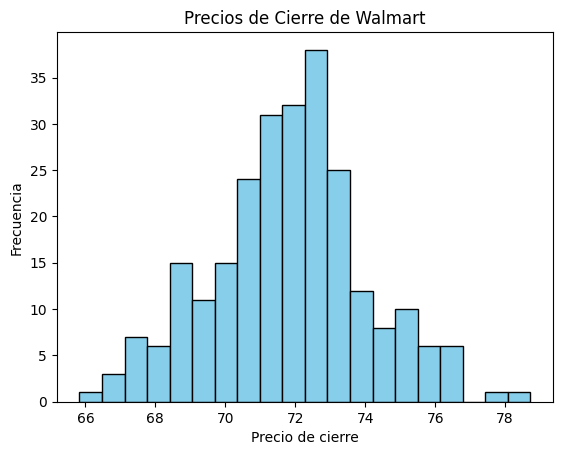

In [27]:
plt.hist(walmart['Close'], bins=20, color='skyblue', edgecolor='black')
plt.title('Precios de Cierre de Walmart')
plt.xlabel('Precio de cierre')
plt.ylabel('Frecuencia')
plt.show()

In [28]:
print('El intervalo: \n',
     (walmart['Close'].mean()-walmart['Close'].std(),
      walmart['Close'].mean()+walmart['Close'].std()))
print('Contiene aproximadamente 68% de los datos.')

El intervalo: 
 (np.float64(69.57984115505838), np.float64(74.01150805129083))
Contiene aproximadamente 68% de los datos.


In [29]:
print('El intervalo: \n',
     (walmart['Close'].mean()-2*walmart['Close'].std(),
      walmart['Close'].mean()+2*walmart['Close'].std()))
print('Contiene aproximadamente 95% de los datos.')

El intervalo: 
 (np.float64(67.36400770694213), np.float64(76.22734149940707))
Contiene aproximadamente 95% de los datos.


In [30]:
print('El intervalo: \n',
     (walmart['Close'].mean()-3*walmart['Close'].std(),
      walmart['Close'].mean()+3*walmart['Close'].std()))
print('Contiene aproximadamente 99.7% de los datos.')

El intervalo: 
 (np.float64(65.1481742588259), np.float64(78.4431749475233))
Contiene aproximadamente 99.7% de los datos.


* Obtenga el precio de cierre más alto y el precio de cierre más bajo a partir del 2023.

In [31]:
walmart_2023 = walmart[walmart['Date']>='2023']
walmart_2023

,Date,Open,High,Low,Close,Adj Close,Volume
127,2023-01-02,68.58,69.87,68.41,69.15,68.42,1134933.0
128,2023-01-03,69.01,70.02,68.80,69.25,68.52,4738324.0
129,2023-01-04,69.15,70.88,68.73,70.48,69.75,8848076.0
130,2023-01-05,70.55,71.08,69.94,70.41,69.67,11016329.0
131,2023-01-06,70.43,72.90,70.22,72.44,71.69,5278309.0
...,...,...,...,...,...,...,...
247,2023-06-26,67.72,68.94,67.55,68.37,68.37,12024363.0
248,2023-06-27,68.20,69.90,68.11,69.79,69.79,14891285.0
249,2023-06-28,69.41,69.69,68.08,68.50,68.50,12828559.0
250,2023-06-29,68.50,68.65,67.73,68.12,68.12,11047919.0


In [32]:
PrecioAlto = walmart_2023['Close'].max()
print("El precio más alto de cierre a partir del 2023 es:", PrecioAlto)

El precio más alto de cierre a partir del 2023 es: 76.15


In [33]:
PrecioBajo = walmart_2023['Close'].min()
print("El precio más bajo de cierre a partir del 2023 es: ",PrecioBajo)

El precio más bajo de cierre a partir del 2023 es:  66.66


* Obtenga las gráficas de las series de tiempo de cada mes del 2023 utilizando subplots.

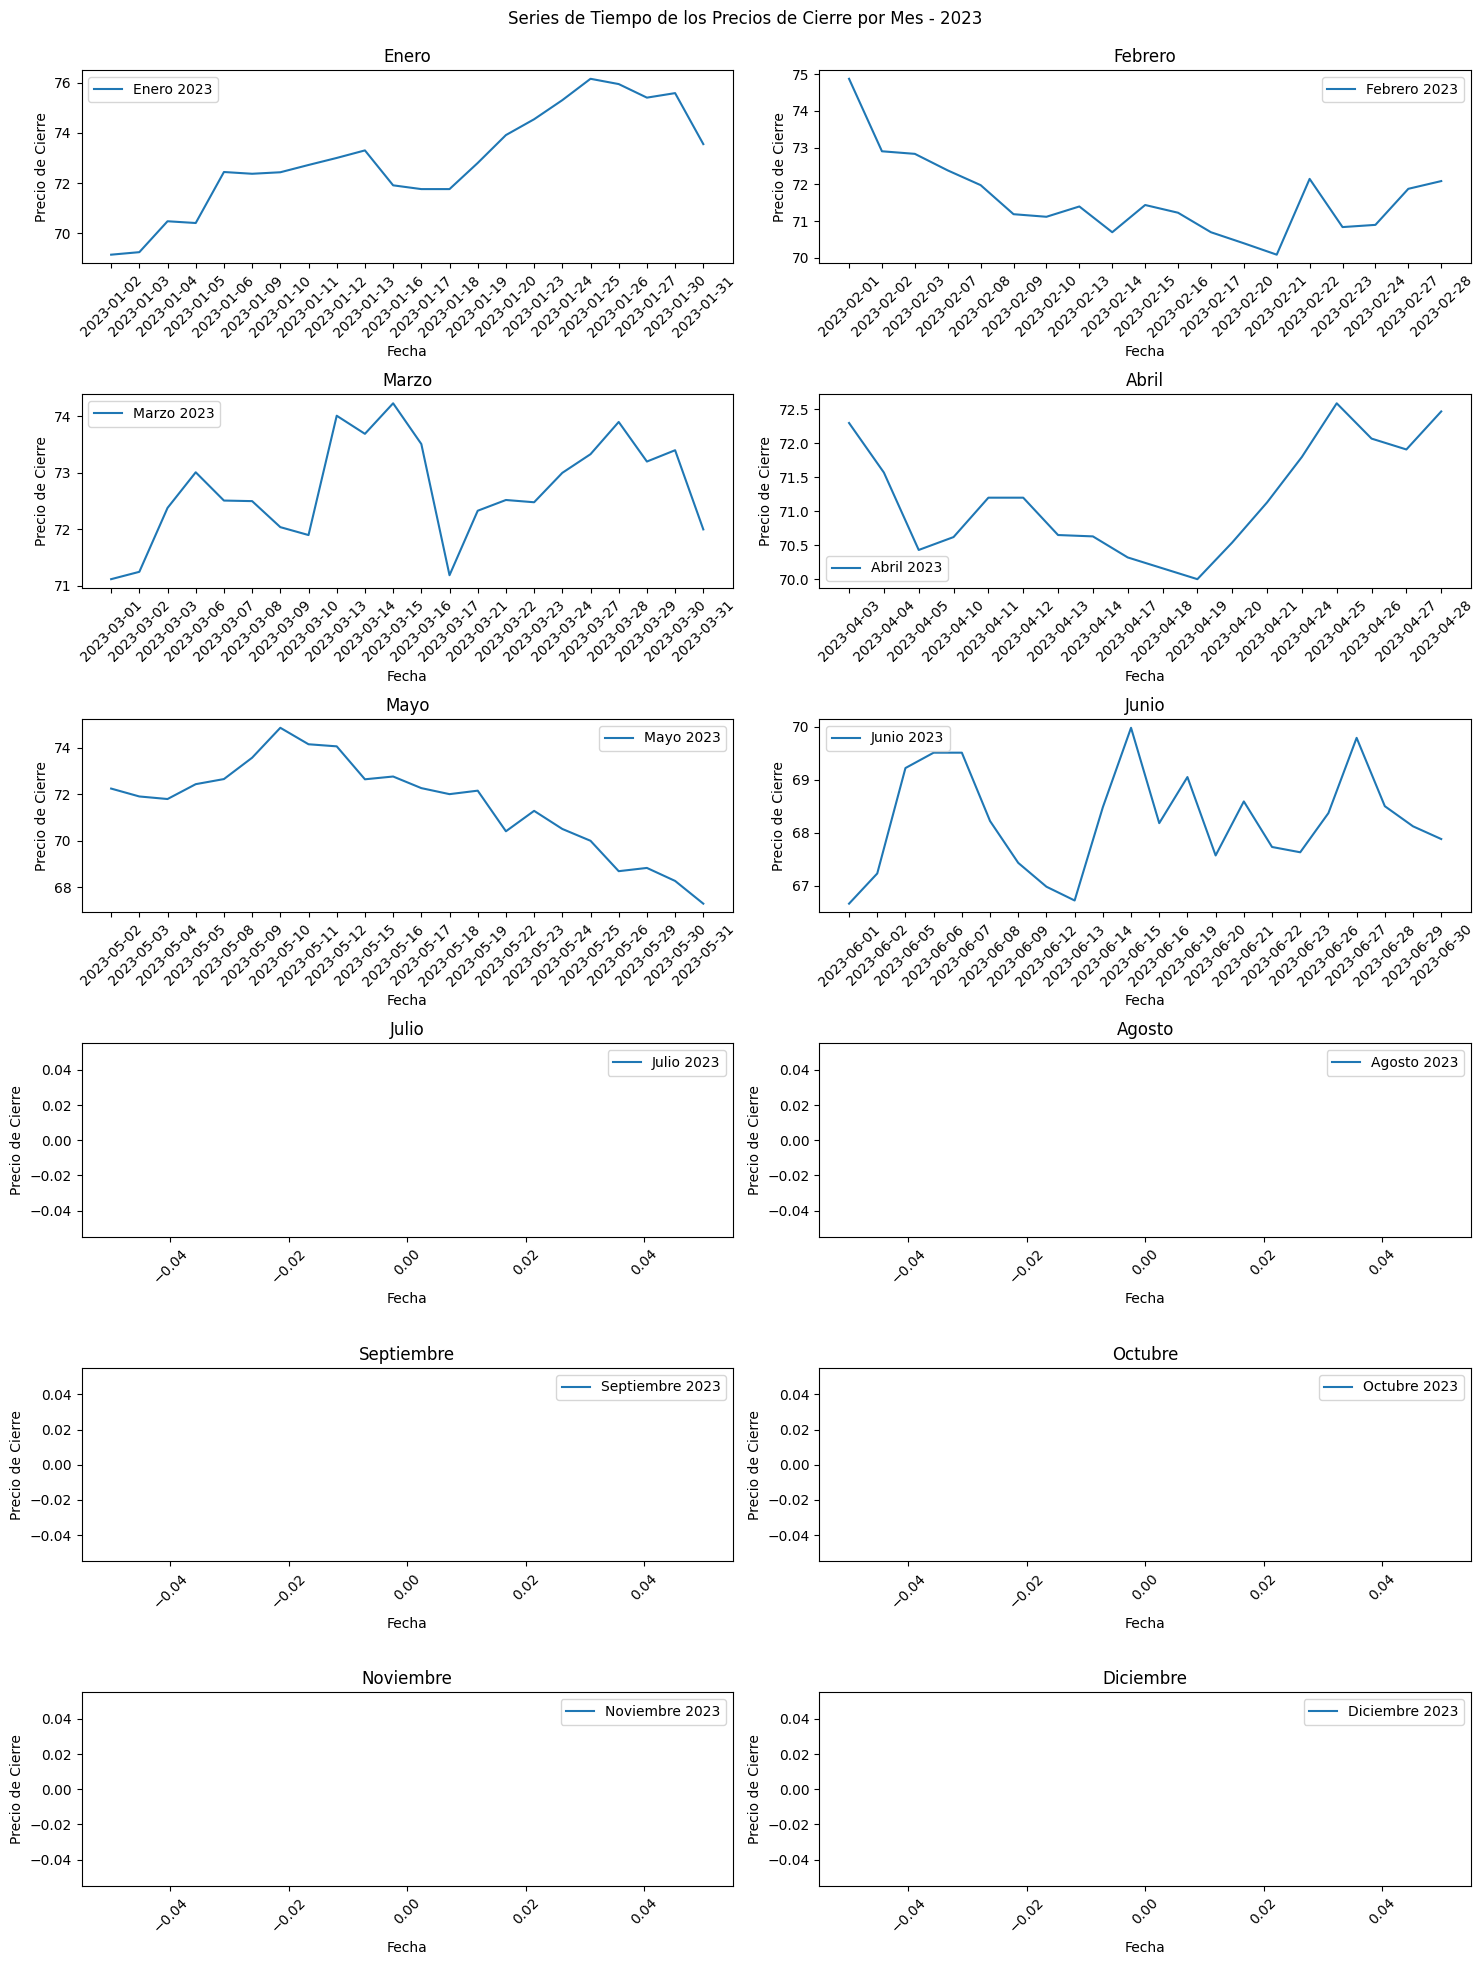

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrando los datos de 2023
walmart_2023 = walmart[walmart['Date'] >= '2023-01-01'].copy()

# Creando una nueva columna para el mes
walmart_2023['Mes'] = pd.to_datetime(walmart_2023['Date']).dt.month

# Crear una figura y subplots
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))
fig.suptitle('Series de Tiempo de los Precios de Cierre por Mes - 2023')

# Lista de nombres de meses para etiquetas
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
         'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# Iterar sobre cada mes y plotear en subplots
for i in range(1, 13):
    ax = axes[(i-1)//2, (i-1)%2]  # Selección del subplot
    walmart_mes = walmart_2023[walmart_2023['Mes'] == i]
    ax.plot(walmart_mes['Date'], walmart_mes['Close'], label=f'{meses[i-1]} 2023')
    ax.set_title(f'{meses[i-1]}')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Precio de Cierre')
    ax.legend()
    ax.tick_params(axis='x', rotation = 45)

# Ajustar el espacio entre subplots
plt.tight_layout()
plt.subplots_adjust(top=0.95)  
plt.show()


* Obtenga las gráficas de caja por mes de los precios de cierre del 2022.

In [35]:
walmart_2022 = walmart[walmart['Date']<='2023-01-01']
walmart_2022

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-07-01,69.68,70.83,68.66,70.23,68.81,7838854.0
1,2022-07-04,70.19,71.51,69.48,69.79,68.38,2529165.0
2,2022-07-05,69.51,70.00,67.93,69.66,68.25,11473504.0
3,2022-07-06,69.27,70.87,68.61,68.83,67.45,7774514.0
4,2022-07-07,68.84,69.73,68.66,68.90,67.51,8896357.0
...,...,...,...,...,...,...,...
122,2022-12-26,71.44,71.52,71.00,71.09,70.35,444593.0
123,2022-12-27,71.37,71.82,70.91,71.02,70.28,3352276.0
124,2022-12-28,70.91,71.54,69.91,70.00,69.26,4871798.0
125,2022-12-29,70.83,70.83,69.12,69.87,69.13,5026928.0


In [36]:
walmart_2022 = walmart_2022.copy()

C:\Users\oscar\AppData\Local\Temp\ipykernel_13704\3290865351.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Close', data=walmart_2022, palette="Set3")


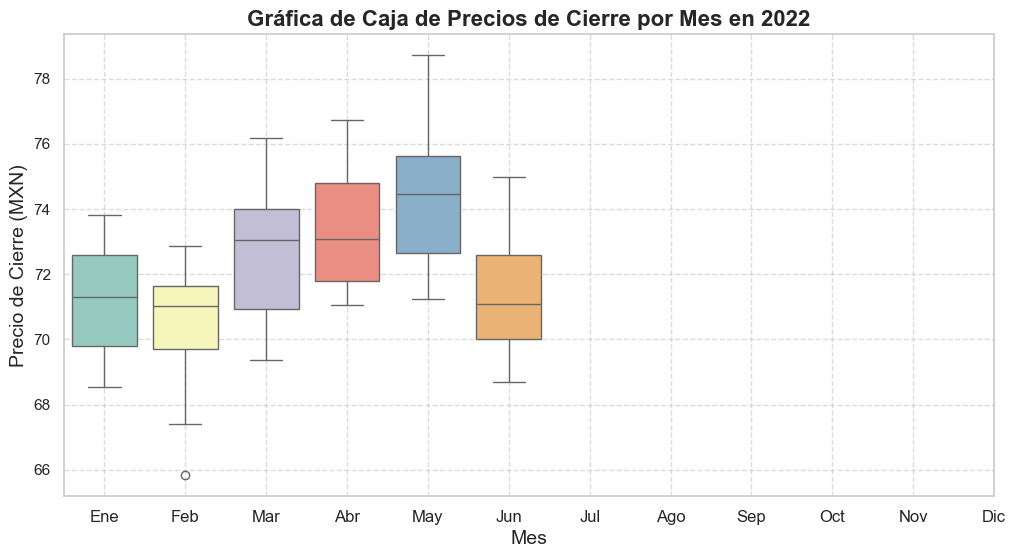

In [41]:
walmart_2022['Date'] = pd.to_datetime(walmart_2022['Date'])

walmart_2022['Month'] = walmart_2022['Date'].dt.month

# Crear la gráfica de caja (boxplot) con una paleta de colores personalizada
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Usar paleta de colores
sns.boxplot(x='Month', y='Close', data=walmart_2022, palette="Set3")

# Personalizar etiquetas de los ejes
plt.title('Gráfica de Caja de Precios de Cierre por Mes en 2022', fontsize=16, fontweight='bold')
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Precio de Cierre (MXN)', fontsize=14)

# Cambiar números de meses a nombres de meses abreviados
meses_abreviados = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
plt.xticks(ticks=range(0, 12), labels=meses_abreviados, fontsize=12)

# Agregar grid
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.show()

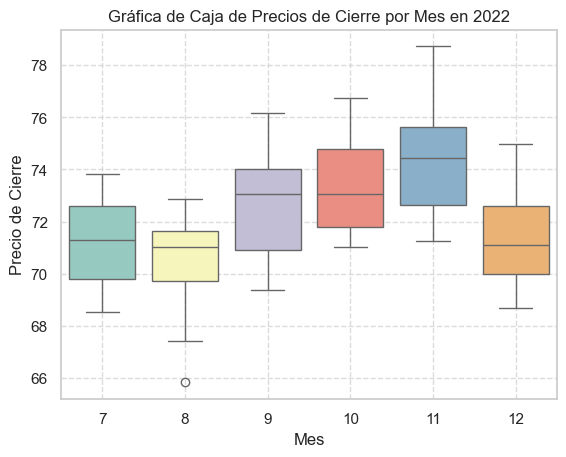

In [45]:
import seaborn as sns
walmart_2022['Date'] = pd.to_datetime(walmart_2022['Date'])

walmart_2022['Month'] = walmart_2022['Date'].dt.month

sns.boxplot(x='Month', y='Close', data=walmart_2022, hue = 'Month', palette="Set3", legend = False)

plt.title('Gráfica de Caja de Precios de Cierre por Mes en 2022')
plt.xlabel('Mes')
plt.ylabel('Precio de Cierre')
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

* ¿Los precios de cierre de todo el año registrado se distribuyen normalmente? Justifique su respuesta.

### Prueba de Normalidad (Shapiro-Wilk)
* La prueba de Shapiro-Wilk es una de las pruebas más comunes para verificar la normalidad de los datos.
* La hipótesis nula (H0) de la prueba es que los datos se distribuyen normalmente.
* Si es el valor de **p** es mayor que un umbral de significancia (generalmente 0.05), no podemos rechazar hipótesis nula, lo que sugiere que los datos siguen una distribución normal

In [49]:
#Implementación de la prueba
import scipy.stats as stats

estadistico, p_value = stats.shapiro(walmart['Close'])

print('Valor del estadístico =%.3f, p_value =%.10f' % (estadistico, p_value))

Valor del estadístico =0.995, p_value =0.4965872616


#### Interpretación de los resultados.
Nuestro valor de p es 0.4966, que es mayor que 0.05, lo que significa que no hay evidencia suficiente para rechazar la hipótesis nula, lo que sugiere que los datos se distribuyen normalmente.

In [47]:
!pip install scipy

   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   - -------------------------------------- 1.6/44.5 MB 10.5 MB/s eta 0:00:05
   -- ------------------------------------- 3.1/44.5 MB 8.8 MB/s eta 0:00:05
   ---- ----------------------------------- 4.7/44.5 MB 8.1 MB/s eta 0:00:05
   ----- ---------------------------------- 5.8/44.5 MB 8.0 MB/s eta 0:00:05
   ------- -------------------------------- 7.9/44.5 MB 7.9 MB/s eta 0:00:05
   -------- ------------------------------- 9.4/44.5 MB 7.8 MB/s eta 0:00:05
   --------- ------------------------------ 11.0/44.5 MB 7.7 MB/s eta 0:00:05
   ----------- ---------------------------- 12.3/44.5 MB 7.7 MB/s eta 0:00:05
   ------------ --------------------------- 14.2/44.5 MB 7.7 MB/s eta 0:00:04
   -------------- ------------------------- 15.7/44.5 MB 7.7 MB/s eta 0:00:04
   --------------- ------------------------ 17.0/44.5 MB 7.6 MB/s eta 0:00:04
   ---------------- ----------------------- 18.9/44.5 MB 7.6 MB/s eta 0:00:04